In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [57]:
df = pd.read_csv('Data/sales-of-shampoo-over-a-three-ye.csv')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Month                                      36 non-null     object 
 1   Sales of shampoo over a three year period  36 non-null     float64
dtypes: float64(1), object(1)
memory usage: 708.0+ bytes


In [30]:
df.head()

,Month,Sales of shampoo over a three year period
0,1-Jan,266.0
1,1-Feb,145.9
2,1-Mar,183.1
3,1-Apr,119.3
4,1-May,180.3


In [58]:
df['year'] = [i.split('-')[0].zfill(2) for i in df['Month']]
df['month'] = [datetime.strptime(i.split('-')[1], '%b').month for i in df['Month']]

In [59]:
df['day'] = 1

In [60]:
df['date_column'] = df[['year', 'month', 'day']].apply(lambda row: ''.join(row.values.astype(str)), axis=1)
df['date_column'] = pd.to_datetime(df['date_column'], format="%y%m%d")

In [61]:
df.head()

,Month,Sales of shampoo over a three year period,year,month,day,date_column
0,1-Jan,266.0,01,1,1,2001-01-01
1,1-Feb,145.9,01,2,1,2001-02-01
2,1-Mar,183.1,01,3,1,2001-03-01
3,1-Apr,119.3,01,4,1,2001-04-01
4,1-May,180.3,01,5,1,2001-05-01


In [63]:
df.set_index('date_column')
series = df['Sales of shampoo over a three year period']

Text(0, 0.5, 'sales')

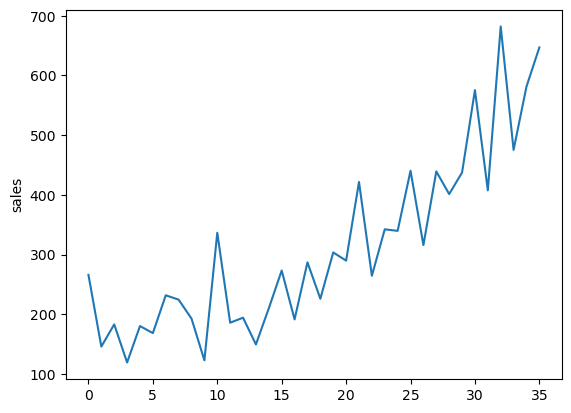

In [65]:
sns.lineplot(series)
plt.ylabel('sales')

In [69]:
rolling_mean = series.rolling(7).mean()
rolling_std = series.rolling(7).std()

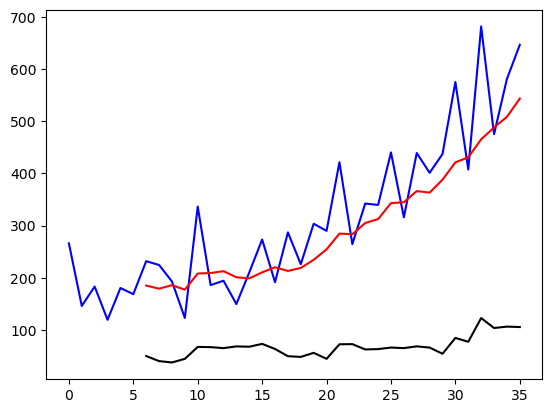

In [70]:
plt.plot(series, color="blue",label="Original Sales Data")
plt.plot(rolling_mean, color="red", label='Rolling Mean')
plt.plot(rolling_std, color="black", label = "Rolling Standard Deviation")

The ADF test is used to ascertain if a time series is stationary by conducting a test for the null hypothesis that the series contains a unit root (or is non-stationary)

In [71]:
from statsmodels.tsa.stattools import adfuller
adft = adfuller(series,autolag="AIC")
adft

(np.float64(3.0601420836411792),
 1.0,
 10,
 25,
 {'1%': np.float64(-3.7238633119999998),
  '5%': np.float64(-2.98648896),
  '10%': np.float64(-2.6328004)},
 np.float64(278.9972644263031))

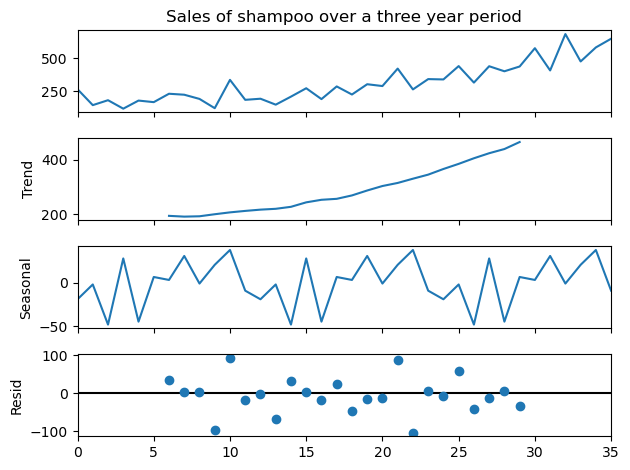

In [82]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(series,model='additive', period=12)
decompose.plot()
plt.show()

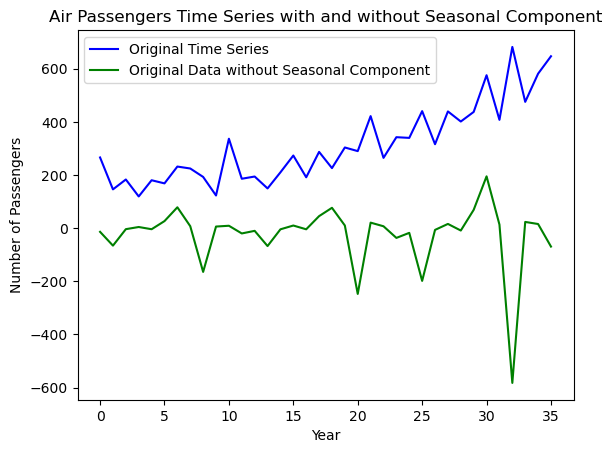

In [83]:
plt.plot(series, label='Original Time Series', color='blue')
data_without_seasonal = series / decompose.seasonal
# Plot the original data without the seasonal component
plt.plot(data_without_seasonal,
         label='Original Data without Seasonal Component', color='green')
plt.title('Air Passengers Time Series with and without Seasonal Component')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

In [99]:
adf_result = adfuller(data_without_seasonal)

print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])


ADF Statistic: -2.9260479701485638
p-value: 0.042401740736888585


In [100]:
adf_result

(np.float64(-2.9260479701485638),
 np.float64(0.042401740736888585),
 9,
 26,
 {'1%': np.float64(-3.7112123008648155),
  '5%': np.float64(-2.981246804733728),
  '10%': np.float64(-2.6300945562130176)},
 np.float64(316.3441400853105))

In [86]:
data_diff = data_without_seasonal.diff().dropna()
adf_result = adfuller(data_diff)
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])

ADF Statistic: -9.81592043900574
p-value: 5.4982618880392747e-17


In [97]:
adf_result

(np.float64(-9.81592043900574),
 np.float64(5.4982618880392747e-17),
 10,
 24,
 {'1%': np.float64(-3.7377092158564813),
  '5%': np.float64(-2.9922162731481485),
  '10%': np.float64(-2.635746736111111)},
 np.float64(263.6074175860384))

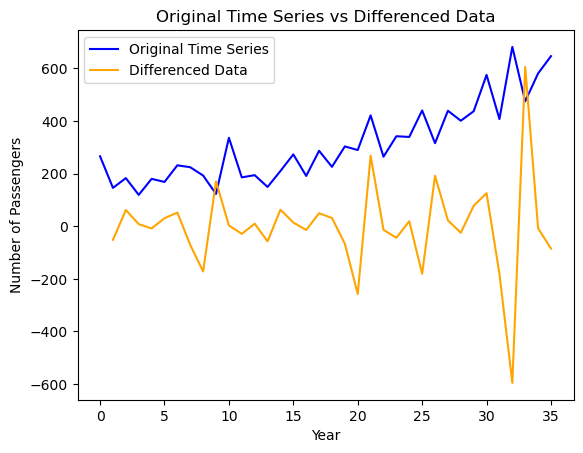

In [87]:
plt.plot(series, label='Original Time Series', color='blue')

plt.plot(data_diff, label='Differenced Data', color='orange')

plt.title('Original Time Series vs Differenced Data')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

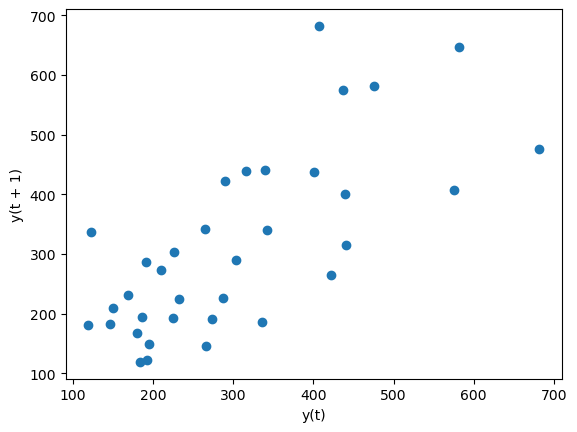

In [89]:
from pandas.plotting import lag_plot
from matplotlib import pyplot
lag_plot(series)
pyplot.show()

In [90]:
values = pd.DataFrame(series.values)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

          t-1       t+1
t-1  1.000000  0.719482
t+1  0.719482  1.000000


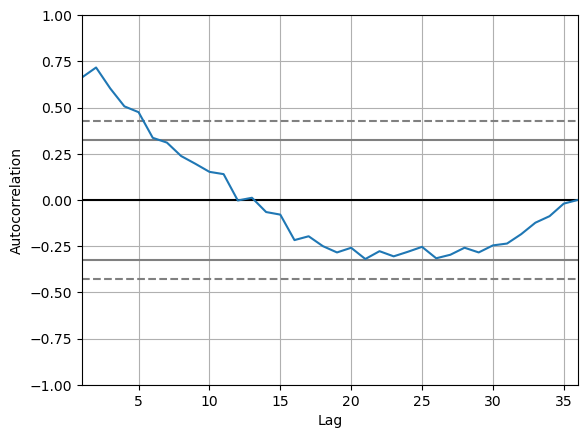

In [91]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series)
pyplot.show()

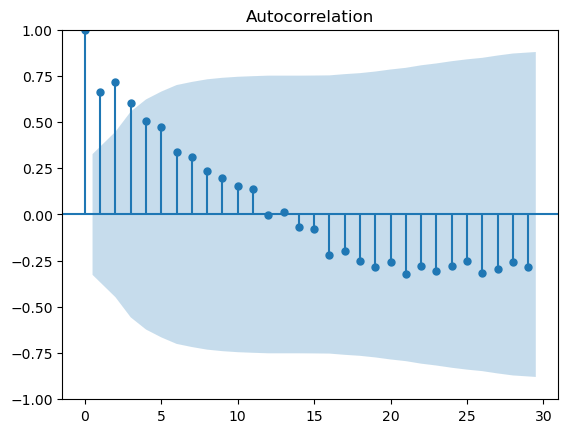

In [92]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(series, lags=29)   
pyplot.show()

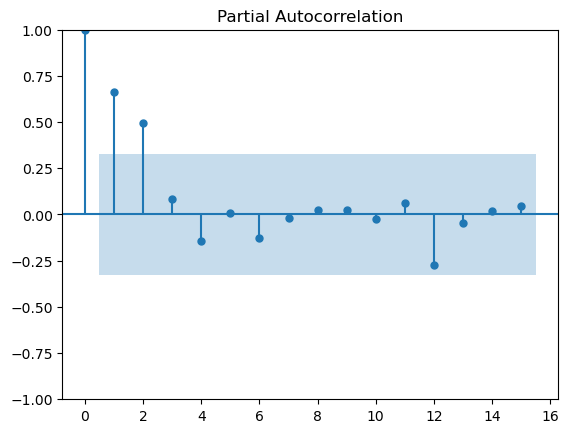

In [93]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(series, lags=15)
pyplot.show()

In [ ]:
train = df[df[''] < pd.to_datetime("2003-09", format='%Y-%m')]
train['train'] = train['#Passengers']
del train['Date']
del train['#Passengers']
test = df[df['Date'] >= pd.to_datetime("1960-08", format='%Y-%m')]
del test['Date']
test['test'] = test['#Passengers']
del test['#Passengers']
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.title("Train/Test split for Passenger Data")
plt.ylabel("Passenger Number")
plt.xlabel('Year-Month')
sns.set()
plt.show()

In [95]:
from pmdarima.arima import auto_arima
model = auto_arima(series, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(series)
forecast = model.predict(n_periods=3)
forecast = pd.DataFrame(forecast,index = series.index,columns=['Prediction'])

ModuleNotFoundError: No module named 'pmdarima'

C:\Users\Administrator\AppData\Local\Temp\ipykernel_2660\1610756176.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index_seasonal = pd.to_datetime(pd.date_range(start='2023-01-01', periods=len(data_seasonal), freq='M'))
C:\Users\Administrator\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Administrator\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Administrator\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1431: RuntimeWarning: divide by zero encountered in divide
  test_statistic = numer_squared_sum / denom_s

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                   24
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 113.802
Date:                            Fri, 21 Nov 2025   AIC                           -217.605
Time:                                    14:53:47   BIC                           -215.615
Sample:                                01-31-2023   HQIC                          -218.859
                                     - 12-31-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1      -1.835e-10   1.88e-18  -9.76e+07      0.000   -1.84e-10   -1.84e-10
ma.L1      -1.815e-10   1.88e-18  -

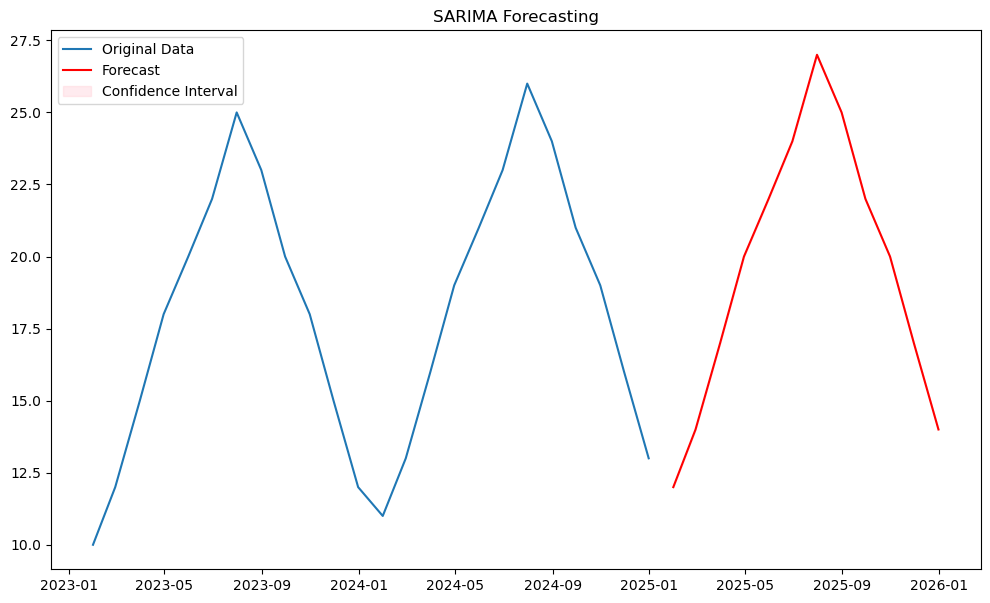

In [94]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Load or create your time series data with seasonality
# Example: Seasonal data (e.g., monthly sales with yearly seasonality)
data_seasonal = [10, 12, 15, 18, 20, 22, 25, 23, 20, 18, 15, 12,
                 11, 13, 16, 19, 21, 23, 26, 24, 21, 19, 16, 13]
index_seasonal = pd.to_datetime(pd.date_range(start='2023-01-01', periods=len(data_seasonal), freq='M'))
ts_seasonal = pd.Series(data_seasonal, index=index_seasonal)

# Fit SARIMA model (example order (1,1,1) and seasonal order (1,1,1,12) for yearly seasonality)
model_sarima = SARIMAX(ts_seasonal, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
fitted_model_sarima = model_sarima.fit()

# Print model summary
print(fitted_model_sarima.summary())

# Make predictions
forecast_steps_sarima = 12
forecast_sarima = fitted_model_sarima.get_forecast(steps=forecast_steps_sarima)
forecast_values_sarima = forecast_sarima.predicted_mean
forecast_ci_sarima = forecast_sarima.conf_int()

# Plot results
plt.figure(figsize=(12, 7))
plt.plot(ts_seasonal, label='Original Data')
plt.plot(forecast_values_sarima.index, forecast_values_sarima, color='red', label='Forecast')
plt.fill_between(forecast_ci_sarima.index, forecast_ci_sarima.iloc[:, 0], forecast_ci_sarima.iloc[:, 1], color='pink', alpha=0.3, label='Confidence Interval')
plt.title('SARIMA Forecasting')
plt.legend()
plt.show()

arima(p d q)

d:
Stationarity: The ADF test is used to check for stationarity in a time series. A stationary time series has constant statistical properties (mean, variance, and autocorrelation) over time. Many time series models (like ARIMA) require stationary data.
Non-Stationarity and Differencing: If the ADF test indicates that a time series is non-stationary (e.g., a high p-value), differencing is often applied to make it stationary. Differencing involves subtracting the previous observation from the current observation.
First-order differencing (d=1): y_t' = y_t - y_{t-1}
Second-order differencing (d=2): y_t'' = y_t' - y_{t-1}' = (y_t - y_{t-1}) - (y_{t-1} - y_{t-2})

Plot ACF and PACF: Generate Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots of the stationary series using statsmodels.graphics.tsaplots.plot_acf and plot_pacf.
Identify p: The PACF plot helps determine p. Look for the lag where the PACF plot "cuts off" (drops significantly to near zero) after a certain number of lags. This cutoff point suggests the value of p.
Identify q: The ACF plot helps determine q. Similar to PACF, look for the lag where the ACF plot "cuts off" after a certain number of lags, indicating the value of q.
Consider mixed models: If both ACF and PACF show a slow decay (tail off), it might indicate a mixed ARMA process, and you might need to explore combinations of p and q.

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# Load your time series data (replace with your data)
# data = pd.read_csv('your_data.csv', index_col='Date', parse_dates=True)
# series = data['Value']

# Example non-stationary data
series = pd.Series([i**2 + 5*i + 10 + (i % 10) * 2 for i in range(100)])

# 1. Determine d (differencing order)
result = adfuller(series)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

if result[1] > 0.05:
    print("Series is non-stationary. Applying differencing.")
    differenced_series = series.diff().dropna()
    # Repeat ADF test on differenced_series if needed
    # result_diff = adfuller(differenced_series)
    # print(f'p-value after differencing: {result_diff[1]}')
    d = 1 # Assuming one differencing makes it stationary for this example
else:
    print("Series is stationary.")
    d = 0

# 2. Determine p and q (AR and MA orders)
plot_acf(series if d == 0 else differenced_series, lags=20)
plt.title('Autocorrelation Function (ACF)')
plt.show()

plot_pacf(series if d == 0 else differenced_series, lags=20)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

# Based on visual inspection of ACF/PACF, estimate p and q.
# For example, if PACF cuts off at lag 2 and ACF tails off, p=2, q=0 (ARIMA(2,d,0))
p = 2 # Example estimation
q = 0 # Example estimation

# 3. Fit ARIMA model
model = ARIMA(series, order=(p, d, q))
model_fit = model.fit()
print(model_fit.summary())